Capstone Project - Data Analysis (Movies)
Exploratory data analysis (EDA) on movies dataset.
To clean, sanitise, and explore the movies.csv dataset.
Taks involves:
- Load the dataframe in
- Clean the data
- Remove duplicate rows
- Discard entries with a zero movie budget
- Manipulate certain columns to the correct data type
- Answer some questions about the data

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

In [2]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')
movies_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make the decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [3]:
#Drop the columns
movies_df = movies_df.drop(['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline'], axis=1)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows

In [4]:
# Checking duplicate rows
duplicates = movies_df.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

0

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [5]:
# Checking zero budget
num_zero_budget = (movies_df['budget'] == 0).sum()
print (f"There are {num_zero_budget} rows with zero budget")

There are 1037 rows with zero budget


In [6]:
# Checking zero revenue
num_zero_revenue = (movies_df['revenue'] == 0).sum()
print(f"There are {num_zero_revenue} rows with zero revenue")

There are 1427 rows with zero revenue


Missing values overview:

([<matplotlib.axis.XTick at 0x16bd66792e8>,
 [Text(0, 0, 'budget'),
  Text(1, 0, 'genres'),
  Text(2, 0, 'id'),
  Text(3, 0, 'popularity'),
  Text(4, 0, 'production_countries'),
  Text(5, 0, 'release_date'),
  Text(6, 0, 'revenue'),
  Text(7, 0, 'runtime'),
  Text(8, 0, 'spoken_languages'),
  Text(9, 0, 'title'),
  Text(10, 0, 'vote_average'),
  Text(11, 0, 'vote_count')])

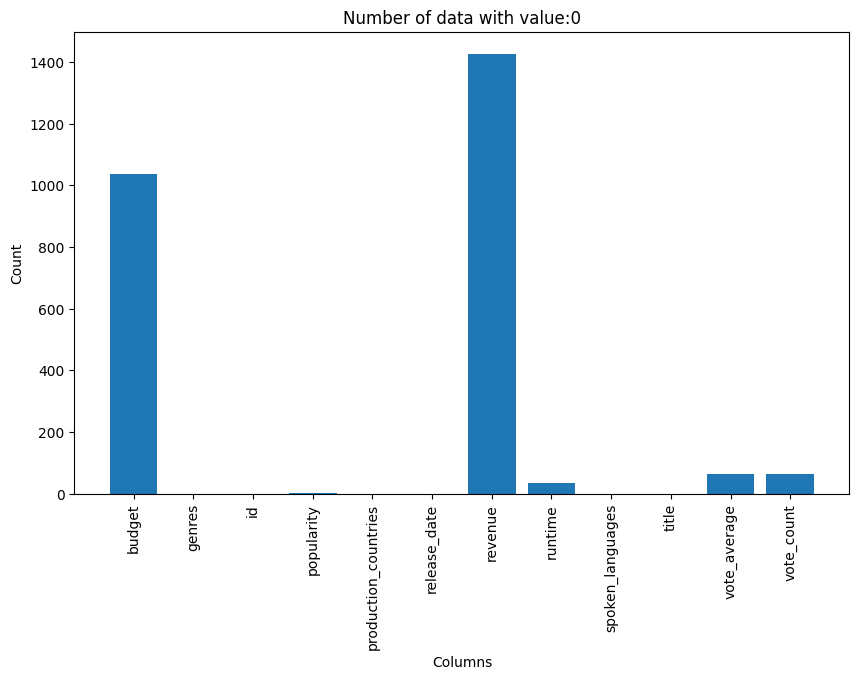

In [7]:
# Calculate the count of missing values
missing_count = movies_df.eq(0).sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(missing_count)), missing_count)
plt.title('Number of data with value:0')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(range(len(missing_count)), missing_count.index, rotation=90)

In [8]:
# Drop the rows with zero budget or zero revenue
movies_df.drop(movies_df[(movies_df['budget'] == 0) | (movies_df['revenue'] == 0)].index, inplace=True)

# Rechecked wth sattus
num_zero_budget = (movies_df['budget'] == 0).sum()
num_zero_revenue = (movies_df['revenue'] == 0).sum()
print(f"There are {num_zero_budget} row with zero budget and {num_zero_revenue} row with zero revenue")

There are 0 row with zero budget and 0 row with zero revenue


The dataframe is down to 3229 rows × 12 columns:

In [9]:
movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",2292,19.748658,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Clerks,7.4,755
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",692,4.553644,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pink Flamingos,6.2,110
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Cure,7.4,63
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658


In [10]:
# Checking null
null_m = movies_df.isnull().sum()
null_m

budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [11]:
# Change the release_date column to DateTime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
# Extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year

#Chcecking 'release_year'
movies_df['release_year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4773    1994
4788    1972
4792    1997
4796    2004
4798    1992
Name: release_year, Length: 3229, dtype: int64

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [12]:
# Change budget and revenue columns to a integer data type using numpy’s int64 method.
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3229 non-null   int64         
 1   genres                3229 non-null   object        
 2   id                    3229 non-null   int64         
 3   popularity            3229 non-null   float64       
 4   production_countries  3229 non-null   object        
 5   release_date          3229 non-null   datetime64[ns]
 6   revenue               3229 non-null   int64         
 7   runtime               3229 non-null   float64       
 8   spoken_languages      3229 non-null   object        
 9   title                 3229 non-null   object        
 10  vote_average          3229 non-null   float64       
 11  vote_count            3229 non-null   int64         
 12  release_year          3229 non-null   int64         
dtypes: datetime64[ns](

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [13]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [14]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
1338,36000000,"['Drama', 'Thriller', 'Crime']",8470,27.465433,['United States of America'],2002-02-15,102244770,116.0,"['English', 'Español']",John Q,7.0,594,2002


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [15]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('Action')]
action_movies

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4664,230000,"['Drama', 'Action', 'Crime']",18533,18.450613,['United Kingdom'],2008-10-09,2260712,92.0,['English'],Bronson,6.9,733,2008
4670,400000,"['Adventure', 'Action', 'Thriller', 'Science F...",9659,33.142185,['Australia'],1979-04-12,100000000,93.0,['English'],Mad Max,6.6,1213,1979
4701,150000,"['Action', 'Drama', 'Romance']",5822,0.132878,['United States of America'],1971-04-23,15200000,97.0,['English'],Sweet Sweetback's Baadasssss Song,4.6,18,1971
4772,31192,"['Drama', 'Action', 'Comedy']",42151,1.330379,['United Kingdom'],2009-09-01,10000,89.0,['English'],Down Terrace,6.3,26,2009


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined some questions to help identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

<strong>Information about the 5 most expensive movies:</strong>

In [16]:
# The 5 most expensive movies
most_expensive_movies = movies_df.nlargest(5, 'budget')
most_expensive_movies

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


 To explore the most expensive movies highlights, we will select the relevant information from the data frame.
 Besides, we will also add two columns: 'roi' and 'profit_margin' to have better view for the insights.
 
 ROI (Return on Investment) in % = (Current Value of Investment−Cost of Investment) / Cost of Investment = (profit / budget) x100
 
 Profit Margin in % = ((Revenue - Cost) / Revenue) x100
 
 ROI and profit margin are indicators to tell if the movies are profitable

In [17]:

most_expensive_movies = movies_df.nlargest(5, 'budget')
cheapest_movies = movies_df.nsmallest(5, 'budget')

most_expensive_movies['profit'] = most_expensive_movies['revenue'] - most_expensive_movies['budget']
most_expensive_movies['roi'] = most_expensive_movies['profit'] / most_expensive_movies['budget'] * 100
most_expensive_movies['profit_margin'] = (most_expensive_movies['profit'] / most_expensive_movies['revenue']) * 100

cheapest_movies['profit'] = cheapest_movies['revenue'] - cheapest_movies['budget']
cheapest_movies['roi'] = cheapest_movies['profit'] / cheapest_movies['budget'] * 100
cheapest_movies['profit_margin'] = (cheapest_movies['profit'] / cheapest_movies['revenue']) * 100

most_expensive_columns = ['Title', 'Budget', 'Revenue', 'Profit', 'ROI', 'Profit Margin', 'Vote Average', 'Popularity']
cheapest_columns = ['Title', 'Budget', 'Revenue', 'Profit', 'ROI', 'Profit Margin', 'Vote Average', 'Popularity']

print("Most Expensive Movies:")
print(most_expensive_movies[['title', 'budget', 'revenue', 'profit', 'roi', 'profit_margin', 'vote_average', 'popularity']].to_string(index=False, header=most_expensive_columns))

print("\nCheapest Movies:")
print(cheapest_movies[['title', 'budget', 'revenue', 'profit', 'roi', 'profit_margin', 'vote_average', 'popularity']].to_string(index=False, header=cheapest_columns))

Most Expensive Movies:
                                      Title    Budget    Revenue     Profit        ROI Profit Margin Vote Average Popularity
Pirates of the Caribbean: On Stranger Tides 380000000 1045713802  665713802 175.187843     63.661185          6.4 135.413856
   Pirates of the Caribbean: At World's End 300000000  961000000  661000000 220.333333     68.782518          6.9 139.082615
                    Avengers: Age of Ultron 280000000 1405403694 1125403694 401.929891     80.076899          7.3 134.279229
                           Superman Returns 270000000  391081192  121081192  44.844886     30.960628          5.4  57.925623
                                John Carter 260000000  284139100   24139100   9.284269      8.495522          6.1  43.926995

Cheapest Movies:
             Title Budget Revenue  Profit           ROI Profit Margin Vote Average Popularity
      Modern Times      1 8500000 8499999  8.499999e+08     99.999988          8.1  28.276480
A Farewell to Arms   

There are huge difference of budget and revenue on the expensive movies and cheapest movies : 

The budget and revenue of expensive movies reached (x10<sup>9</sup>) while cheapest movies could have just single value for them. We will put them separately on the graph.

<strong>1. Budget vs Revenue on the most expensive movies and cheapest movies:</strong>

<strong>Top 5 expensive movies:</strong>

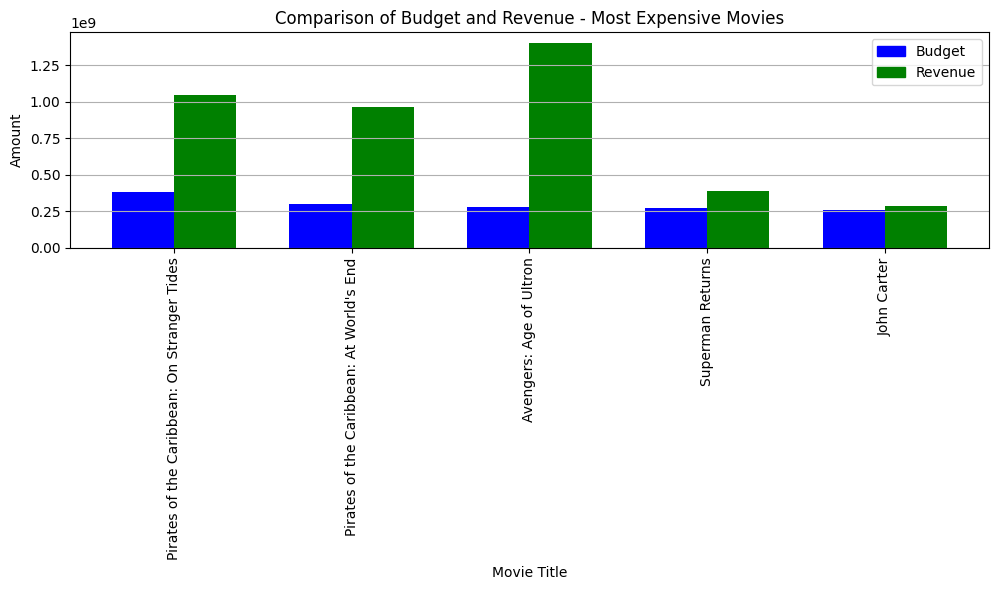

In [18]:
# Create a list of movie titles for the x-axis
titles = most_expensive_movies['title'].tolist()

# Create a list of budget and revenue for the y-axis
budgets = most_expensive_movies['budget'].tolist()
revenues = most_expensive_movies['revenue'].tolist()

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(titles))
bars1 = plt.bar(index, budgets, bar_width, color='blue', label='Budget')
bars2 = plt.bar(index + bar_width, revenues, bar_width, color='green', label='Revenue')

plt.xticks(index + bar_width / 2, titles, rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Amount')
plt.title('Comparison of Budget and Revenue - Most Expensive Movies')
plt.grid(axis='y')

# Create custom legend handles with colors
budget_patch = mpatches.Patch(color='blue')
revenue_patch = mpatches.Patch(color='green')

# Add a legend with custom handles
plt.legend(handles=[budget_patch, revenue_patch], labels=['Budget', 'Revenue'])

# Display the chart
plt.tight_layout()
plt.show()

<strong>Top 5 cheapest movies:</strong>

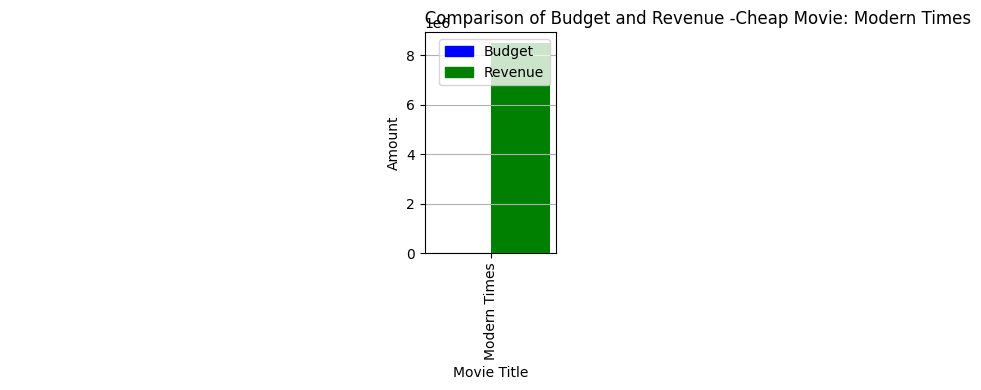

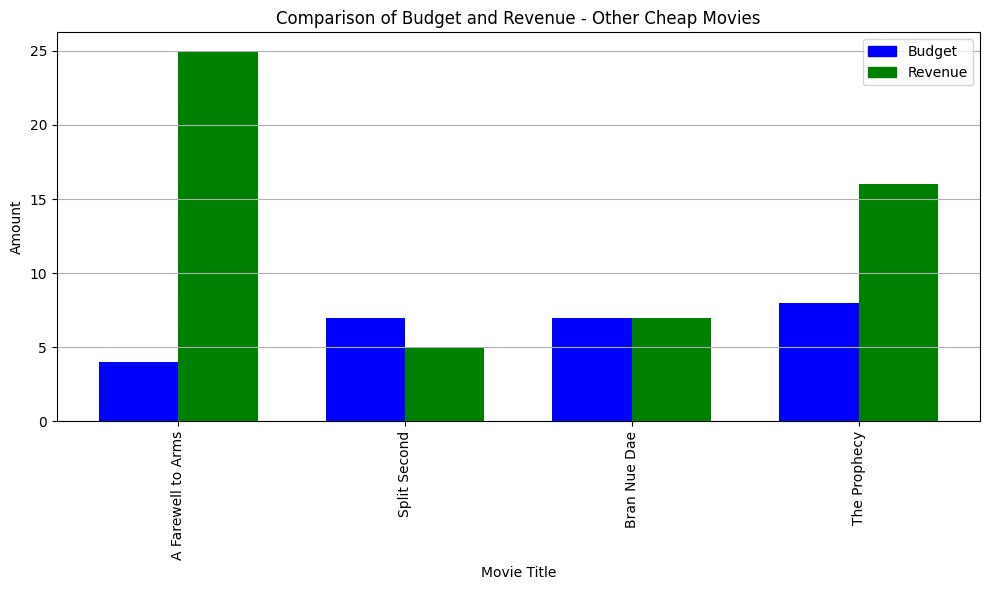

In [46]:
# Filter the movie with title 'Modern Times'
modern_times_movie = cheapest_movies[cheapest_movies['title'] == 'Modern Times']

# Filter the rest of the movies in cheapest_movies
other_movies = cheapest_movies[cheapest_movies['title'] != 'Modern Times']

# Create a list of movie titles for the x-axis
titles_modern_times = modern_times_movie['title'].tolist()
titles_other_movies = other_movies['title'].tolist()

# Create a list of budget and revenue for the y-axis
budgets_modern_times = modern_times_movie['budget'].tolist()
revenues_modern_times = modern_times_movie['revenue'].tolist()

budgets_other_movies = other_movies['budget'].tolist()
revenues_other_movies = other_movies['revenue'].tolist()

# Plot the data for 'Modern Times' as a bar chart
plt.figure(figsize=(2, 4))
bar_width = 0.35
index_modern_times = np.arange(len(titles_modern_times))
bars1_modern_times = plt.bar(index_modern_times, budgets_modern_times, bar_width, color='blue', label='Budget')
bars2_modern_times = plt.bar(index_modern_times + bar_width, revenues_modern_times, bar_width, color='green', label='Revenue')

plt.xticks(index_modern_times + bar_width / 2, titles_modern_times, rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Amount')
plt.title('                                                                               Comparison of Budget and Revenue -Cheap Movie: Modern Times')
plt.grid(axis='y')

# Create custom legend handles with colors
budget_patch = mpatches.Patch(color='blue')
revenue_patch = mpatches.Patch(color='green')

# Add a legend with custom handles
plt.legend(handles=[budget_patch, revenue_patch], labels=['Budget', 'Revenue'])

# Display the chart for 'Modern Times'
plt.tight_layout()
plt.show()

# Plot the data for the rest of the movies as a bar chart
plt.figure(figsize=(10, 6))
index_other_movies = np.arange(len(titles_other_movies))
bars1_other_movies = plt.bar(index_other_movies, budgets_other_movies, bar_width, color='blue', label='Budget')
bars2_other_movies = plt.bar(index_other_movies + bar_width, revenues_other_movies, bar_width, color='green', label='Revenue')

plt.xticks(index_other_movies + bar_width / 2, titles_other_movies, rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Amount')
plt.title('Comparison of Budget and Revenue - Other Cheap Movies')
plt.grid(axis='y')

# Add a legend with custom handles
plt.legend(handles=[budget_patch, revenue_patch], labels=['Budget', 'Revenue'])

# Display the chart for the rest of the movies
plt.tight_layout()
plt.show()

<strong>2. Profit on the most expensive movies and cheapest movies:</strong>

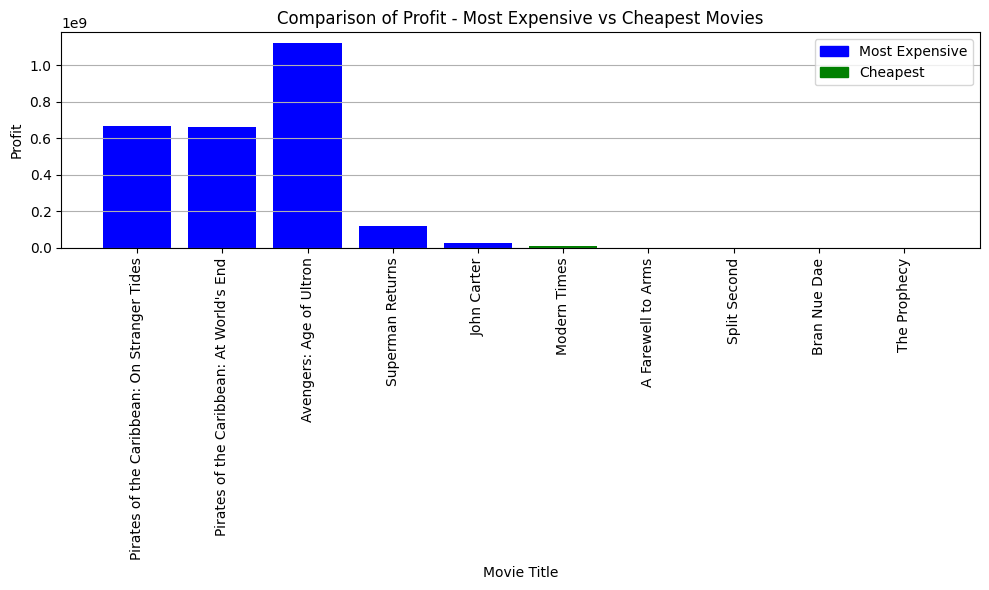

In [20]:

# Get the profit values for both sets of movies
most_expensive_profit = most_expensive_movies['profit']
cheapest_profit = cheapest_movies['profit']

# Create a list of movie titles for the x-axis
titles = most_expensive_movies['title'].tolist() + cheapest_movies['title'].tolist()

# Create a list of profit values for the y-axis
profit_values = most_expensive_profit.tolist() + cheapest_profit.tolist()

#Create a list of colors for the bars
colors = ['blue'] * len(most_expensive_movies) + ['green'] * len(cheapest_movies)

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(titles, profit_values, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Profit')
plt.title('Comparison of Profit - Most Expensive vs Cheapest Movies')
plt.grid(axis='y')

# Create custom legend handles with colors
most_expensive_patch = mpatches.Patch(color='blue', label='Most Expensive')
cheapest_patch = mpatches.Patch(color='green', label='Cheapest')

# Add a legend with custom handles
plt.legend(handles=[most_expensive_patch, cheapest_patch])

# Display the chart
plt.tight_layout()
plt.show()

<strong>3. Profit margin (%) on the most expensive movies and cheapest movies:</strong>

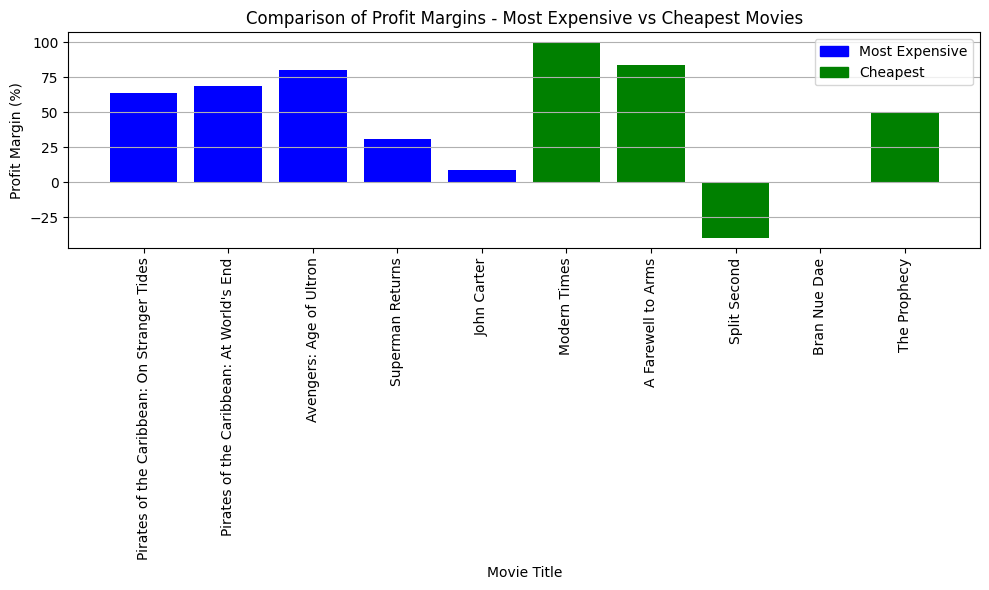

In [21]:

# Create a list of movie titles for the x-axis
titles = most_expensive_movies['title'].tolist() + cheapest_movies['title'].tolist()

# Create a list of profit margins for the y-axis
profit_margins = most_expensive_movies['profit_margin'].tolist() + cheapest_movies['profit_margin'].tolist()

# Create a list of colors for the bars
colors = ['blue'] * len(most_expensive_movies) + ['green'] * len(cheapest_movies)

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(titles, profit_margins, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Profit Margin (%)')
plt.title('Comparison of Profit Margins - Most Expensive vs Cheapest Movies')
plt.grid(axis='y')

# Create custom legend handles with colors
most_expensive_patch = mpatches.Patch(color='blue')
cheapest_patch = mpatches.Patch(color='green')

# Add a legend with custom handles
plt.legend(handles=[most_expensive_patch, cheapest_patch], labels=['Most Expensive', 'Cheapest'])

# Display the chart
plt.tight_layout()
plt.show()

<strong>4. ROI (Return on Investment) in % on the most expensive movies and cheapest movies:</strong>

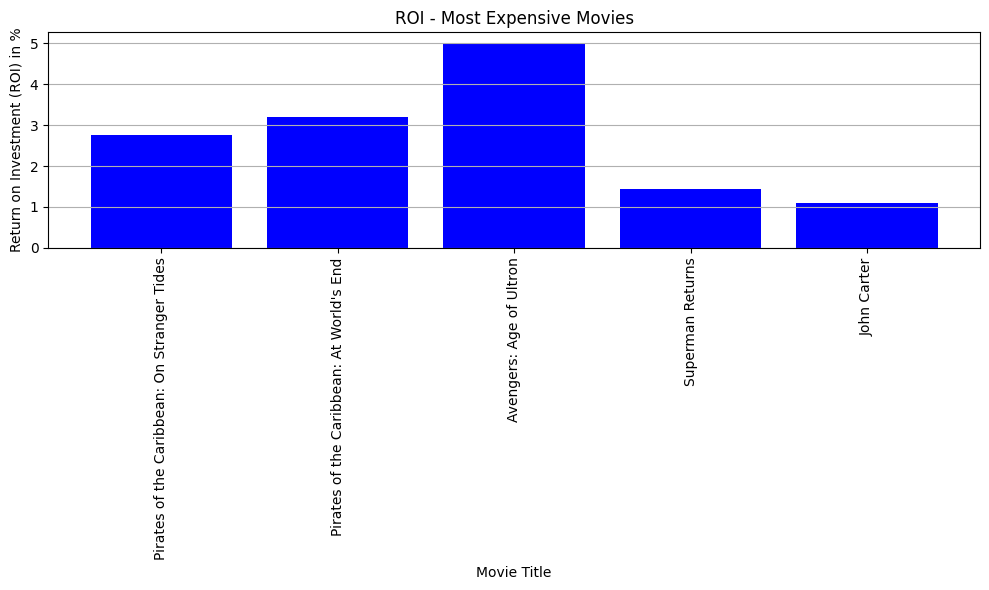

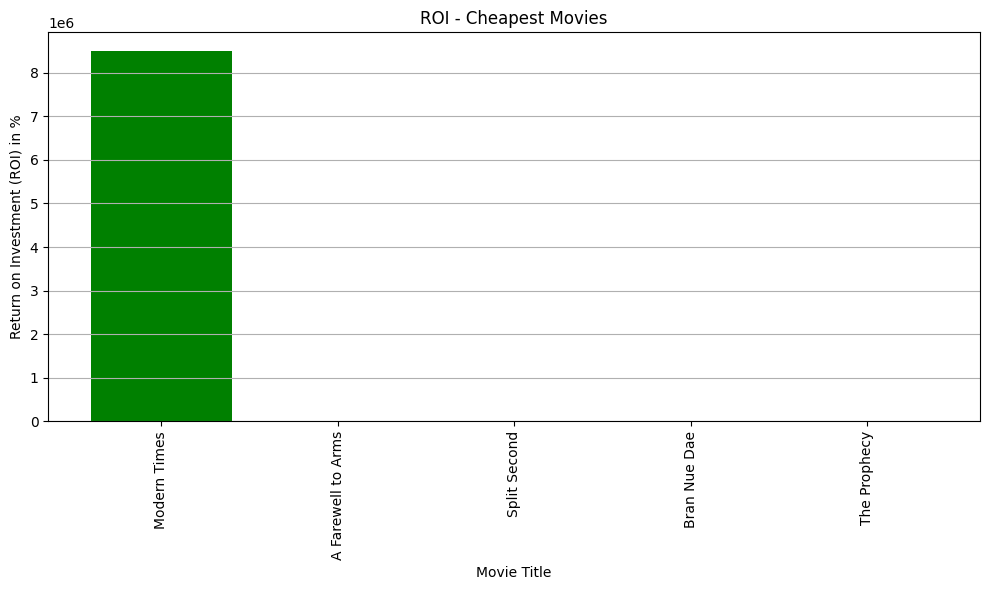

In [22]:
# Calculate ROI for most_expensive_movies
most_expensive_movies['roi'] = most_expensive_movies['revenue'] / most_expensive_movies['budget']

# Calculate ROI for cheapest_movies
cheapest_movies['roi'] = cheapest_movies['revenue'] / cheapest_movies['budget']

# Create a list of movie titles for the x-axis
titles_most_expensive = most_expensive_movies['title'].tolist()
titles_cheapest = cheapest_movies['title'].tolist()

# Create a list of ROI for the y-axis
roi_most_expensive = most_expensive_movies['roi'].tolist()
roi_cheapest = cheapest_movies['roi'].tolist()

# Plot the data for most_expensive_movies as a bar chart
plt.figure(figsize=(10, 6))
index_most_expensive = np.arange(len(titles_most_expensive))
bars_most_expensive = plt.bar(index_most_expensive, roi_most_expensive, color='blue')

plt.xticks(index_most_expensive, titles_most_expensive, rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Return on Investment (ROI) in %')
plt.title('ROI - Most Expensive Movies')
plt.grid(axis='y')

# Display the chart for most_expensive_movies
plt.tight_layout()
plt.show()

# Plot the data for cheapest_movies as a bar chart
plt.figure(figsize=(10, 6))
index_cheapest = np.arange(len(titles_cheapest))
bars_cheapest = plt.bar(index_cheapest, roi_cheapest, color='green')

plt.xticks(index_cheapest, titles_cheapest, rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Return on Investment (ROI) in %')
plt.title('ROI - Cheapest Movies')
plt.grid(axis='y')

# Display the chart for cheapest_movies
plt.tight_layout()
plt.show()

<strong>5. Popularity on the most expensive movies and cheapest movies:</strong>

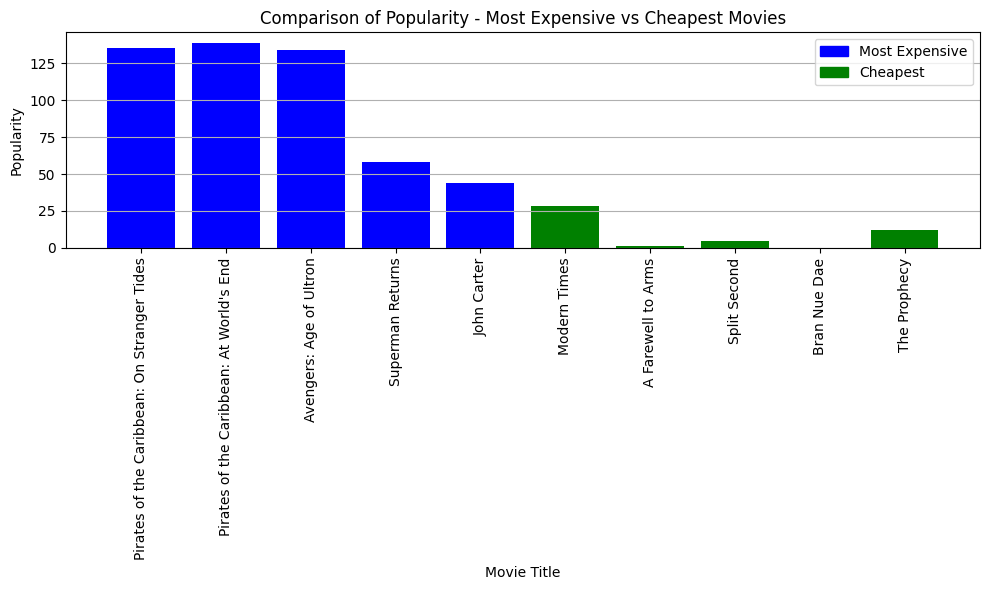

In [23]:
# Select the most expensive and cheapest movies based on budget
most_expensive_movies = movies_df.nlargest(5, 'budget')
cheapest_movies = movies_df.nsmallest(5, 'budget')

# Get the popularity values for both sets of movies
most_expensive_popularity = most_expensive_movies['popularity']
cheapest_popularity = cheapest_movies['popularity']

# Create a list of movie titles for the x-axis
titles = most_expensive_movies['title'].tolist() + cheapest_movies['title'].tolist()

# Create a list of popularity values for the y-axis
popularity_values = most_expensive_popularity.tolist() + cheapest_popularity.tolist()

# Create a list of colors for the bars
colors = ['blue'] * len(most_expensive_movies) + ['green'] * len(cheapest_movies)

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(titles, popularity_values, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.title('Comparison of Popularity - Most Expensive vs Cheapest Movies')
plt.grid(axis='y')

# Create custom legend handles with colors
most_expensive_patch = mpatches.Patch(color='blue', label='Most Expensive')
cheapest_patch = mpatches.Patch(color='green', label='Cheapest')

# Add a legend with custom handles
plt.legend(handles=[most_expensive_patch, cheapest_patch])

# Display the chart
plt.tight_layout()
plt.show()

<strong>6. Vote average on the most expensive movies and cheapest movies:</strong>

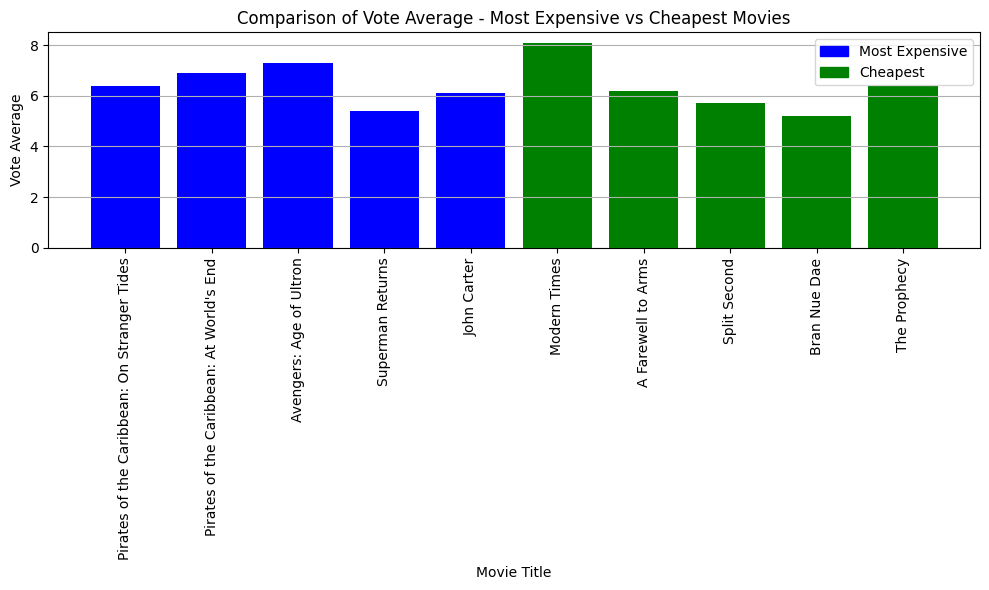

In [24]:
# Select the most expensive and cheapest movies based on budget
most_expensive_movies = movies_df.nlargest(5, 'budget')
cheapest_movies = movies_df.nsmallest(5, 'budget')

# Get the vote_average values for both sets of movies
most_expensive_vote_average = most_expensive_movies['vote_average']
cheapest_vote_average = cheapest_movies['vote_average']

# Create a list of movie titles for the x-axis
titles = most_expensive_movies['title'].tolist() + cheapest_movies['title'].tolist()

# Create a list of vote_average values for the y-axis
vote_average_values = most_expensive_vote_average.tolist() + cheapest_vote_average.tolist()

# Create a list of colors for the bars
colors = ['blue'] * len(most_expensive_movies) + ['green'] * len(cheapest_movies)

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(titles, vote_average_values, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Vote Average')
plt.title('Comparison of Vote Average - Most Expensive vs Cheapest Movies')
plt.grid(axis='y')

# Create custom legend handles with colors
most_expensive_patch = mpatches.Patch(color='blue', label='Most Expensive')
cheapest_patch = mpatches.Patch(color='green', label='Cheapest')

# Add a legend with custom handles
plt.legend(handles=[most_expensive_patch, cheapest_patch])

# Display the chart
plt.tight_layout()
plt.show()

<strong>To see if some movies are worth the money spent on them based on their performance and revenue generated.</strong>

This is a not an easy question to answer because performance of a movie could be defined in different ways based on different opinions and indicators. Here we may look at <strong> 1.revenue, 2.profit, 3.profit margin, 4.ROI , 5.popularity and 6.vote average</strong> to decide if they are worth the money <strong>(budget)</strong>.

<strong>Based on 1.revenue,2.profit,3.profit margin and 4.ROI:</strong>

Expensive movies

The most expensive movies listed are "Pirates of the Caribbean: On Stranger Tides," "Pirates of the Caribbean: At World's End," "Avengers: Age of Ultron," "Superman Returns," and "John Carter." These films had enormous budgets, ranging from \\$260 million to \\$380 million.

"Pirates of the Caribbean: On Stranger Tides" and "Pirates of the Caribbean: At World's End" are the two most expensive movies (\\$380 million and \\$300 million) in the list. While they have high budgets, they also generated significant revenue (\\$1,045 million and \\$961 million) , resulting in substantial profits. Their profit margins are relatively good (64% & 69%), indicating that they were successful ventures.

"Avengers: Age of Ultron" had a high budget (\\$280 million) but generated even higher revenue (\\$1,405 million), leading to a significant profit (\\$1.13 billion). Its profit margin (80%) is quite impressive, suggesting that it was a highly successful movie in terms of financial returns.

Despite the high budgets of expensive movies, the profitability and return on investment (ROI) of these movies vary significantly. The film that generated the highest profit among the most expensive movies was "Avengers: Age of Ultron" with a staggering profit of \\$1.13 billion. It achieved an ROI of 401 % (compared with previous two movies :175%, 220%) indicating its financial success.

However, "Superman Returns" had a substantial budget(\\$270 million), but its revenue(\\$391 million), profit (\\$121 million), profit margin (30%), ROI (44.84%) are relatively lower than the previous movies, which suggests that despite its high production cost, it might not worth the money in terms of revenue.
"John Carter" had a considerable budget(\\$260 million), but its revenue(\\$284 million), profit (\\$24 million)and profit margin (8%) are relatively low. This indicates that the movie struggled to recoup its production costs and generate substantial profits. Again, it may not worth the money.

The most expensive movies vary in their success, with some generating significant profits and others underperforming. 

The cheapest movies

Comparing these expensive movies to the cheapest movies listed, such as "Modern Times," "A Farewell to Arms," "Split Second," "Bran Nue Dae," and "The Prophecy," we can see a stark contrast in terms of budget and profitability. The cheapest movies had significantly lower budgets, ranging from \\$1 to \\$8.

Interestingly, the film "Modern Times" stands out among the cheapest movies. It had an extremely low budget of only \\$1  but generated a substantial profit of \\$8.5 million, resulting in an impressive ROI of 849,999,900%, a substantial profit margin of nearly 100%.. This highlights the exceptional performance and profitability of this particular movie despite its minimal budget.


Other cheapest movies had mixed outcomes, with some achieving high profit margins despite their minimal budgets, while others resulted in losses or break-even scenarios. I

In summary, exploring the most expensive and cheapest movies reveals a wide range of financial outcomes. While some expensive movies justify their budgets with high profitability and ROI, others may not perform as well. On the other hand, some of the cheapest movies manage to deliver exceptional returns on their minimal investments. These comparisons emphasize the importance of evaluating a movie's financial performance in relation to its budget and revenue generated to determine if it was worth the money spent on its production.

<strong>Based other performance (5.Popularity and 6.vote average) : </strong>

Among the most expensive movies, "Avengers: Age of Ultron" stands out with a high popularity score of 134 and a relatively high vote average of 7.3. This indicates that the film was well-received by the audience and had a significant level of popularity.

The "Pirates of the Caribbean" movies also performed well in terms of popularity, with both "On Stranger Tides" and "At World's End" having scores above 130. However, their vote average ratings are slightly lower compared to "Avengers: Age of Ultron," ranging from 6.4 to 6.9.

In contrast, "Superman Returns" and "John Carter" had lower popularity scores, indicating a relatively lower level of audience interest. Their vote average ratings were also moderate, ranging from 5.4 to 6.1.

Moving on to the cheapest movies, "Modern Times" stands out with a high popularity score of 28, suggesting that it has gained recognition and interest despite being a low-budget film. Additionally, it received a high vote average rating of 8.1, indicating positive audience reception.

The remaining cheapest movies, including "A Farewell to Arms," "Split Second," "Bran Nue Dae," and "The Prophecy," have relatively lower popularity scores and varied vote average ratings, ranging from 1.2 to 6.4. These films may have had a more limited reach or diverse audience reactions.

Overall, when considering popularity and vote average, the most expensive movies generally had higher popularity scores, suggesting a broader audience appeal. Meanwhile, the cheapest movies had a mix of lower and moderate popularity and vote average scores, indicating a more varied performance in terms of audience reception.

<strong>Balancing all contributions:</strong>

In conclusion, "Avengers: Age of Ultron" and "Modern Times" definitely are top two movies stand out from the expensive movies and cheapest movies, worth its budget for production based on their overall performance we have discussed above. "Pirates of the Caribbean: On Stranger Tides" and "Pirates of the Caribbean: At World's End" have also remarkable performance with its budget.

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [25]:
# Calculate the profit for each movie
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Sort the DataFrame by profit in descending order
top_profitable_movies = movies_df.sort_values('profit', ascending=False)

# Get the top 5 most profitable movies
top_5_profitable_movies = top_profitable_movies.head(5)

# Print the top 5 most profitable movies
print(f"The top 5 most profitable movies:\n {top_5_profitable_movies[['title', 'profit']]}")

# Find the movies with minimum and maximum profits
min_profit_movie = top_profitable_movies.loc[top_profitable_movies['profit'].idxmin()]
max_profit_movie = top_profitable_movies.loc[top_profitable_movies['profit'].idxmax()]

# Print the comparison of minimum and maximum profits with movie titles
print("Minimum Profit: {} ({})".format(min_profit_movie['profit'], min_profit_movie['title']))
print("Maximum Profit: {} ({})".format(max_profit_movie['profit'], max_profit_movie['title']))

The top 5 most profitable movies:
              title      profit
0           Avatar  2550965087
25         Titanic  1645034188
28  Jurassic World  1363528810
44       Furious 7  1316249360
16    The Avengers  1299557910
Minimum Profit: -165710090 (The Lone Ranger)
Maximum Profit: 2550965087 (Avatar)


 Profit of 5 most profitable movies:

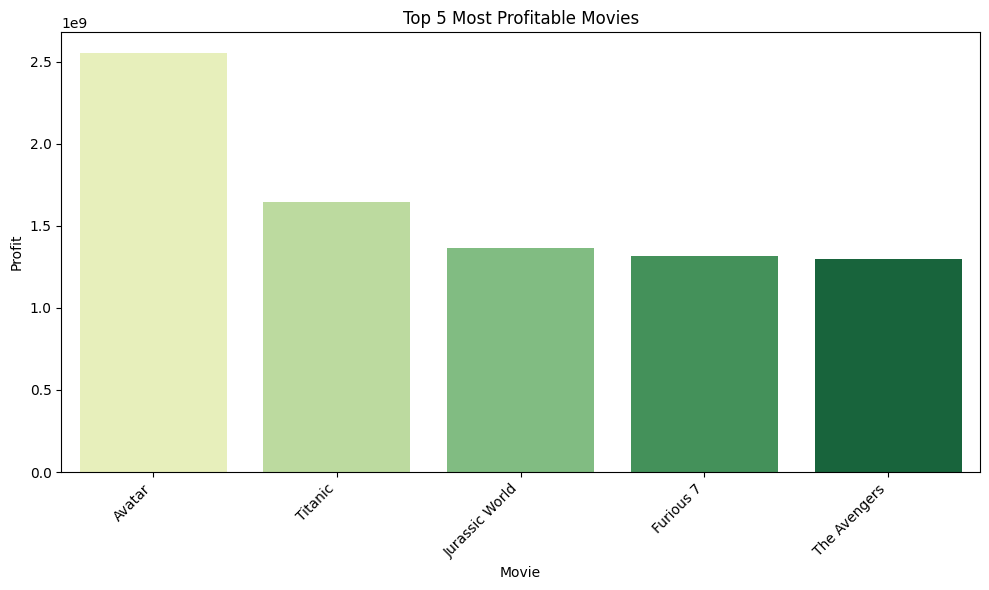

In [47]:
# Calculate the profit for each movie
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Sort the DataFrame by profit in descending order
top_profitable_movies = movies_df.sort_values('profit', ascending=False)

# Get the top 5 most profitable movies
top_5_profitable_movies = top_profitable_movies.head(5)

# Create a bar chart for the top 5 most profitable movies
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_profitable_movies, x='title', y='profit', palette='YlGn')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Movie')
plt.ylabel('Profit')
plt.title('Top 5 Most Profitable Movies')
plt.tight_layout()
plt.show()

Information showing the movies with min and max profits in the dataframe to seek the insights of  their difference:

In [48]:
selected_movies = movies_df.loc[movies_df['title'].isin(['The Lone Ranger', 'Avatar'])]

# Apply styling options to enhance data display
styled_movies = selected_movies.style.set_properties(**{'text-align': 'left'})

# Display the styled DataFrame
styled_movies

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit,release_decade
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fiction']",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10 00:00:00,2787965087,162.000000,"['English', 'Español']",Avatar,7.200000,11800,2009,2550965087,2000
13,255000000,"['Action', 'Adventure', 'Western']",57201,49.046956,['United States of America'],2013-07-03 00:00:00,89289910,149.000000,['English'],The Lone Ranger,5.900000,2311,2013,-165710090,2010


Heatmap (numerical variables):

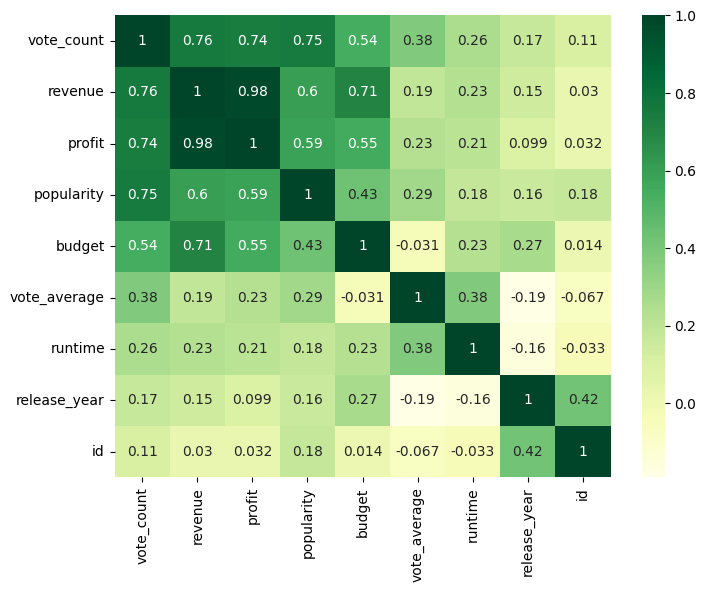

In [27]:
# Generate the correlation matrix
corr_matrix = movies_df.corr()

# Sort the columns based on correlation values
sorted_columns = corr_matrix.abs().sum().sort_values(ascending=False).index
movies_df_sorted = movies_df[sorted_columns]

# Create the larger heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(movies_df_sorted.corr(), annot=True, cmap='YlGn')
plt.show()

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

The top 5 most popular movies:
                        title  popularity
546                  Minions  875.581305
95              Interstellar  724.247784
788                 Deadpool  514.569956
94   Guardians of the Galaxy  481.098624
127       Mad Max: Fury Road  434.278564


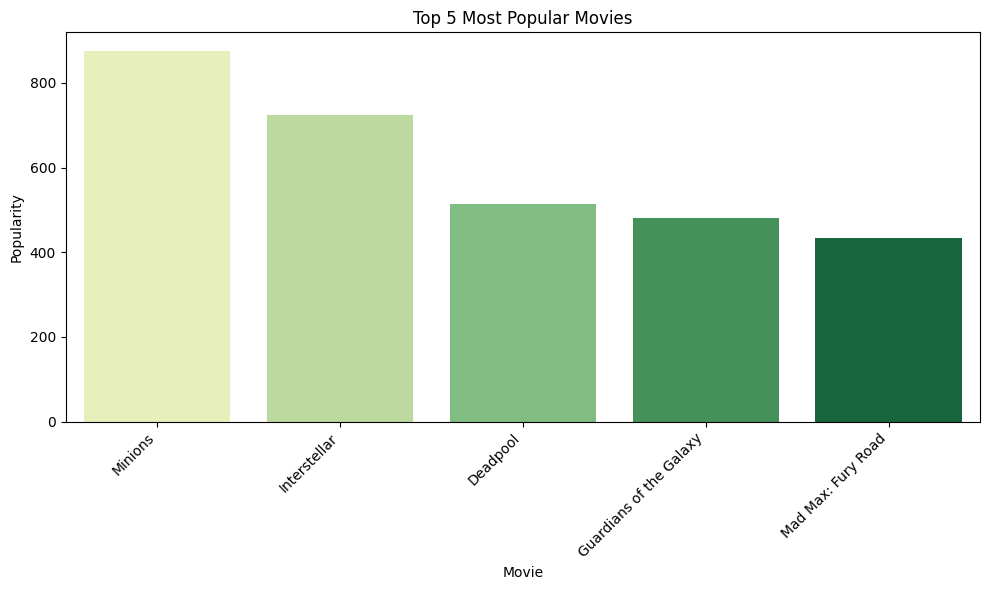

In [52]:
# Sort the DataFrame by popularity in descending order
top_popular_movies = movies_df.sort_values('popularity', ascending=False)

# Get the top 5 most popular movies
top_5_popular_movies = top_popular_movies.head(5)
print(f"The top 5 most popular movies:\n {top_5_popular_movies[['title', 'popularity']]}")

# Create a bar chart for the top 5 most popular movies
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_popular_movies, x='title', y='popularity', palette='YlGn')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Movie')
plt.ylabel('Popularity')
plt.title('Top 5 Most Popular Movies')
plt.tight_layout()
plt.show()

#### Find Movies which are rated above 7

In [29]:
# Filter the DataFrame to include only movies with a rating above 7
highly_rated_movies = movies_df[movies_df['vote_average'] > 7]

# Print the highly rated movies
print(highly_rated_movies[['title', 'vote_average']])



                                       title  vote_average
0                                     Avatar           7.2
3                      The Dark Knight Rises           7.6
6                                    Tangled           7.4
7                    Avengers: Age of Ultron           7.3
8     Harry Potter and the Half-Blood Prince           7.4
...                                      ...           ...
4713                              Roger & Me           7.4
4724                              Eraserhead           7.5
4738                                      Pi           7.1
4773                                  Clerks           7.4
4792                                    Cure           7.4

[637 rows x 2 columns]


Sorting descendingly:

In [55]:
# Filter the DataFrame to include only movies with a rating above 7
highly_rated_movies = movies_df[movies_df['vote_average'] > 7]

# Sort the highly rated movies DataFrame by vote_average in descending order
highly_rated_movies = highly_rated_movies.sort_values('vote_average', ascending=False)

# Print the highly rated movies
print(highly_rated_movies[['title', 'vote_average']])

                                                  title  vote_average
1881                           The Shawshank Redemption           8.5
2970                                 There Goes My Baby           8.5
3337                                      The Godfather           8.4
1818                                   Schindler's List           8.3
3232                                       Pulp Fiction           8.3
3865                                           Whiplash           8.3
2731                             The Godfather: Part II           8.3
662                                          Fight Club           8.3
2294                                      Spirited Away           8.3
4535                                      Seven Samurai           8.2
4602                                       12 Angry Men           8.2
690                                      The Green Mile           8.2
2947               The Visual Bible: The Gospel of John           8.2
3719                

The rating distribution:

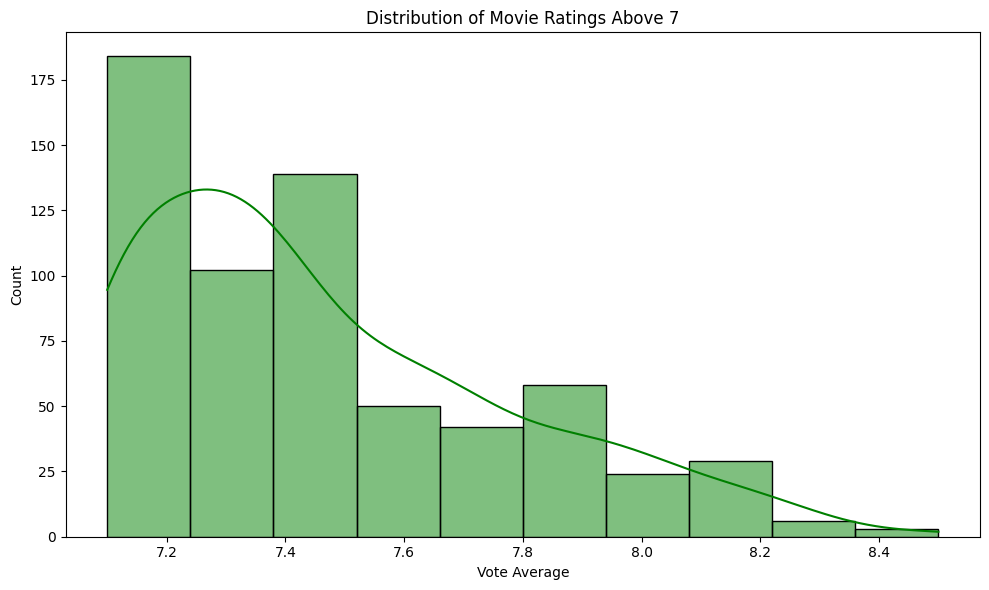

In [54]:
# Filter the DataFrame to include only movies with a rating above 7
highly_rated_movies = movies_df[movies_df['vote_average'] > 7]

# Create a histogram for the movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=highly_rated_movies, x='vote_average', bins=10, kde=True, color='green')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings Above 7')
plt.tight_layout()
plt.show()

#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

In [30]:
# Check for empty or missing values in the 'genres' column
missing_values = movies_df['genres'].isnull().sum()
empty_values = movies_df['genres'].astype(str).str.strip().eq('').sum()

print("Number of missing values in 'genres' column:", missing_values)
print("Number of empty values in 'genres' column:", empty_values)

Number of missing values in 'genres' column: 0
Number of empty values in 'genres' column: 0


Number of different genres in the dataset:

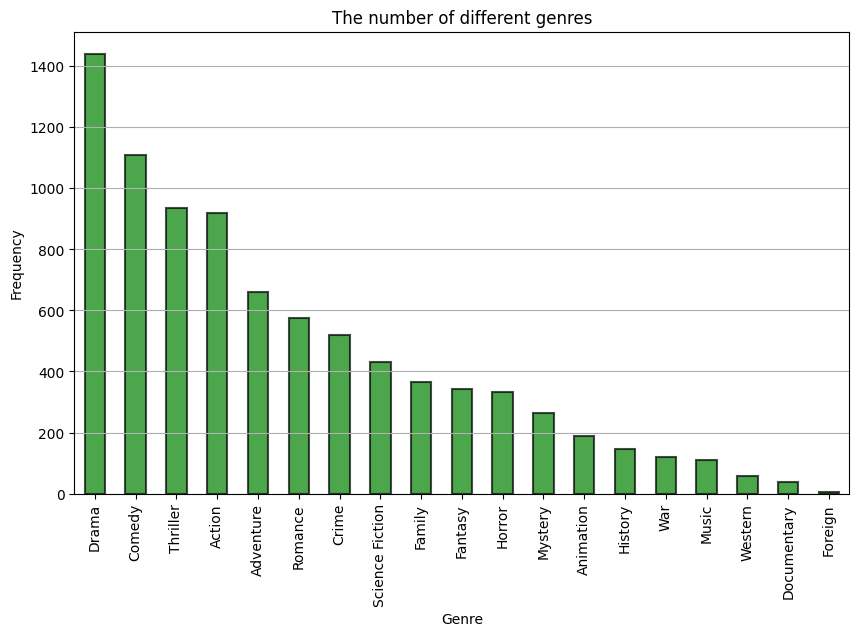

In [31]:
# Flatten the genres column and remove brackets and quotes
genres_flattened = movies_df['genres'].apply(lambda x: [genre.strip("[]'") for genre in x.split(',')]).explode()

# Remove single quotes from genre labels
genres_flattened = genres_flattened.str.replace("'", "")

# Count the frequency of each genre
genre_counts = genres_flattened.value_counts()

# Combine genres with the same name
genre_counts_combined = genre_counts.groupby(genre_counts.index.str.strip()).sum()

# Filter out the empty genre
genre_counts_combined = genre_counts_combined[genre_counts_combined.index != '']

# Sort the genre frequencies in descending order
genre_counts_combined = genre_counts_combined.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
genre_counts_combined.plot(kind='bar', color='green', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('The number of different genres')
plt.grid(axis='y')
plt.show()

To confirm the numbers of the genres and visualise in numbers

In [32]:
# Flatten the genres column and remove brackets and quotes
genres_flattened = movies_df['genres'].apply(lambda x: [genre.strip("[]'") for genre in x.split(',')]).explode()

# Remove single quotes from genre labels
genres_flattened = genres_flattened.str.replace("'", "")

# Remove leading and trailing whitespace from genre labels
genres_flattened = genres_flattened.str.strip()

# Count the number of occurrences of each genre
genre_counts = genres_flattened.value_counts()

# Filter out the empty genre
genre_counts = genre_counts[genre_counts.index != '']

# Sort the genre counts in descending order
genre_counts = genre_counts.sort_values(ascending=False)

# Print the genre counts
print("Genre Counts (Descending Order):")
print(genre_counts)

Genre Counts (Descending Order):
Drama              1441
Comedy             1110
Thriller            935
Action              918
Adventure           661
Romance             574
Crime               521
Science Fiction     431
Family              365
Fantasy             342
Horror              332
Mystery             265
Animation           188
History             145
War                 120
Music               111
Western              57
Documentary          38
Foreign               5
Name: genres, dtype: int64


The top 5 highest number of genres in the dataset:

Drama              1441

Comedy             1110

Thriller            935

Action              918

Adventure           661

<strong>1. The number of genre for top 5 profitable movies:</strong>

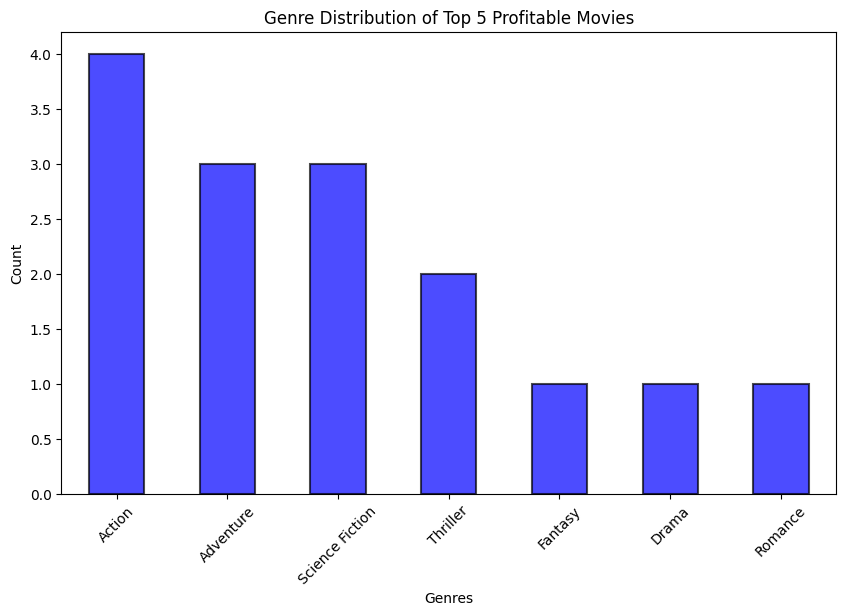

In [33]:
# Retrieve the genres for the top 5 profitable movies
top_5_profitable_movies_genres = movies_df.loc[movies_df['title'].isin(top_5_profitable_movies['title']), 'genres']

# Flatten the genres column and remove brackets and quotes
genres_flattened = top_5_profitable_movies_genres.apply(lambda x: [genre.strip("[]'") for genre in x.split(',')]).explode()

# Remove single quotes from genre labels
genres_flattened = genres_flattened.str.replace("'", "")

# Remove leading and trailing whitespace from genre labels
genres_flattened = genres_flattened.str.strip()

# Count the number of occurrences of each genre
genre_counts = genres_flattened.value_counts()

# Plot the genre counts
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='blue', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.title("Genre Distribution of Top 5 Profitable Movies")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<strong>2. The number of genre for top 5 popular movies:</strong>

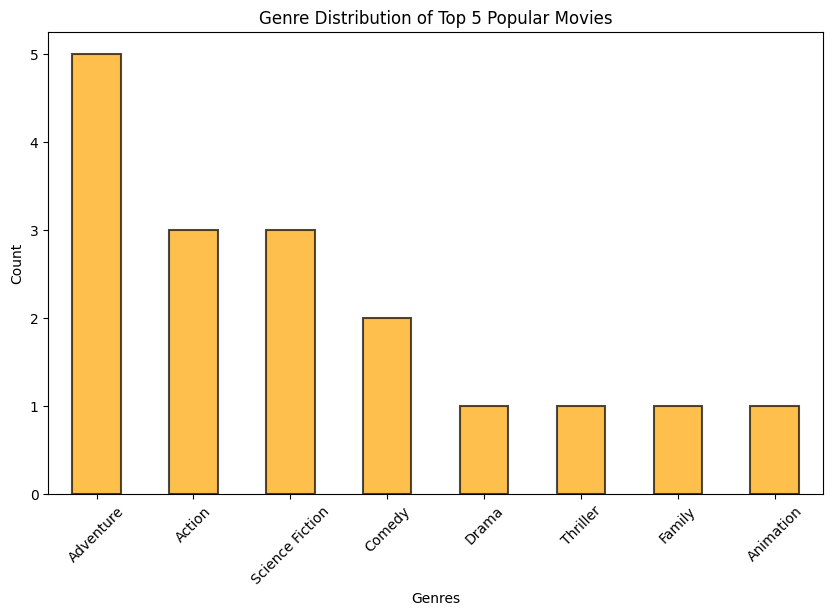

In [34]:
# Retrieve the genres for the top 5 popular movies
top_5_popular_movies_genres = movies_df.loc[movies_df['title'].isin(top_5_popular_movies['title']), 'genres']

# Flatten the genres column and remove brackets and quotes
genres_flattened = top_5_popular_movies_genres.apply(lambda x: [genre.strip("[]'") for genre in x.split(',')]).explode()

# Remove single quotes from genre labels
genres_flattened = genres_flattened.str.replace("'", "")

# Remove leading and trailing whitespace from genre labels
genres_flattened = genres_flattened.str.strip()

# Count the number of occurrences of each genre
genre_counts = genres_flattened.value_counts()

# Plot the genre counts
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='orange', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.title("Genre Distribution of Top 5 Popular Movies")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<strong>3. The number of genre for highly rated (>7) movies :</strong>

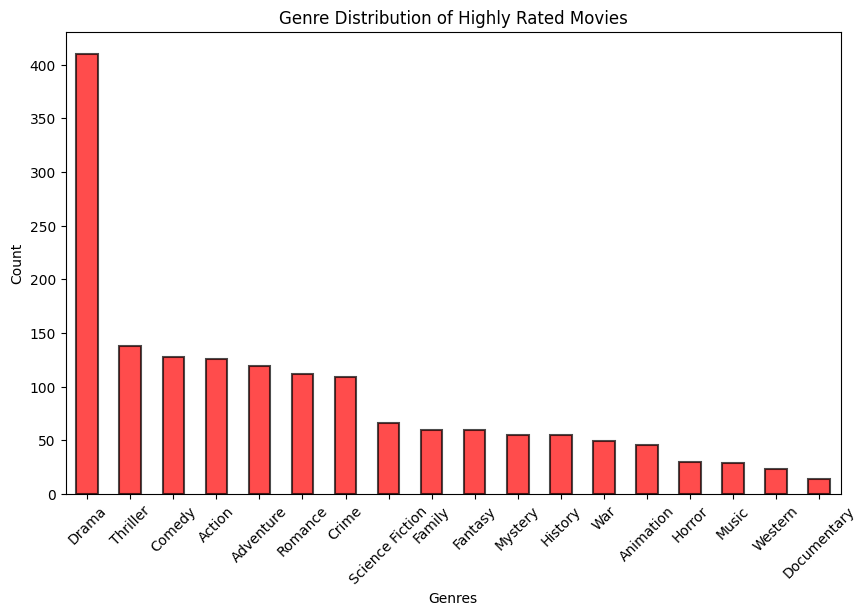

In [35]:
# Retrieve the genres for the highly rated movies
highly_rated_movies_genres = movies_df.loc[movies_df['title'].isin(highly_rated_movies['title']), 'genres']

# Flatten the genres column and remove brackets and quotes
genres_flattened = highly_rated_movies_genres.apply(lambda x: [genre.strip("[]'") for genre in x.split(',')]).explode()

# Remove single quotes from genre labels
genres_flattened = genres_flattened.str.replace("'", "")

# Remove leading and trailing whitespace from genre labels
genres_flattened = genres_flattened.str.strip()

# Count the number of occurrences of each genre
genre_counts = genres_flattened.value_counts()

# Plot the genre counts
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='red', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.title("Genre Distribution of Highly Rated Movies")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

So we have interesting findings here. When we look at the 5 highest number of genres in each bar chart: 1., 2., and 3, we have the following results:

Top 5 profitable movies: <strong>Action, Adventure, Science Friction, Thriller, Fantasy</strong>

Top 5 popular movies: <strong>Adventure,Action,Science Friction, Comedy, Drama</strong>

Highly rated (>7) movies : <strong>Drama, Thriller, Comedy, Action, Adventure</strong>

6 out of 7 of those genres are included in the top 5 highest number of genres in the dataset:

Drama 1441

Comedy 1110

Thriller 935

Action 918

Adventure 661

So, obviously movie production companies understand the market's demand. They clearly know which genres of movies is more profitable and popular in the market, so the production of movies with same kind of genres were made.

<strong>Generate three different interesting visualisations with a data story.</strong>

<strong>1. The bar chart to show the top 5 languages of the movies:</strong>

English is the dominant language of the movies. It is not surprising as English is the international language, and we can also see the next chart which country is dominant on movie production to understand the reason. 

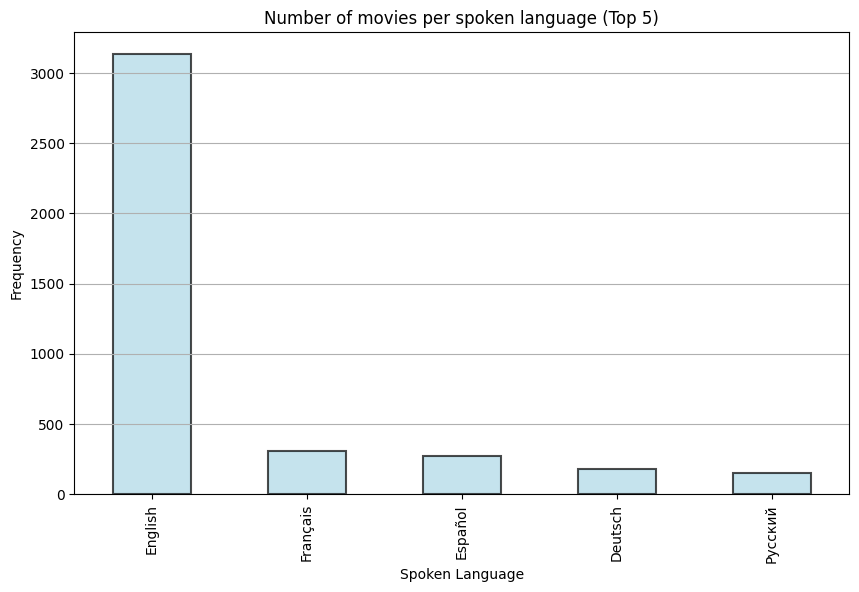

In [36]:
# Flatten the spoken_languages column and split the string values
languages_flattened = movies_df['spoken_languages'].str.replace('[', '', regex=False).str.replace(']', '', regex=False).str.replace("'", '', regex=False).str.split(', ', expand=False)

# Create a new DataFrame with the flattened language values
languages_df = pd.DataFrame({'language': languages_flattened.explode()})

# Remove any empty language values
languages_df = languages_df[languages_df['language'].notna()]

# Calculate the frequency of each language
language_counts = languages_df['language'].value_counts()

# Sort the language frequencies in descending order
language_counts_sorted = language_counts.sort_values(ascending=False)

# Plot the bar chart for the top 5 languages
plt.figure(figsize=(10, 6))
language_counts_sorted.head(5).plot(kind='bar', color='lightblue', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.xlabel('Spoken Language')
plt.ylabel('Frequency')
plt.title('Number of movies per spoken language (Top 5)')
plt.grid(axis='y')
plt.show()

<strong>2. The bar chart to show the top 5 countries of moive production:</strong>

U.S is the dominant country for movie production. The production from U.S is far more (5 times or more) than U.K and other countries.

It also makes senses when we looked the result that English is the dominant language of movies as the official language of U.S. and UK is English.

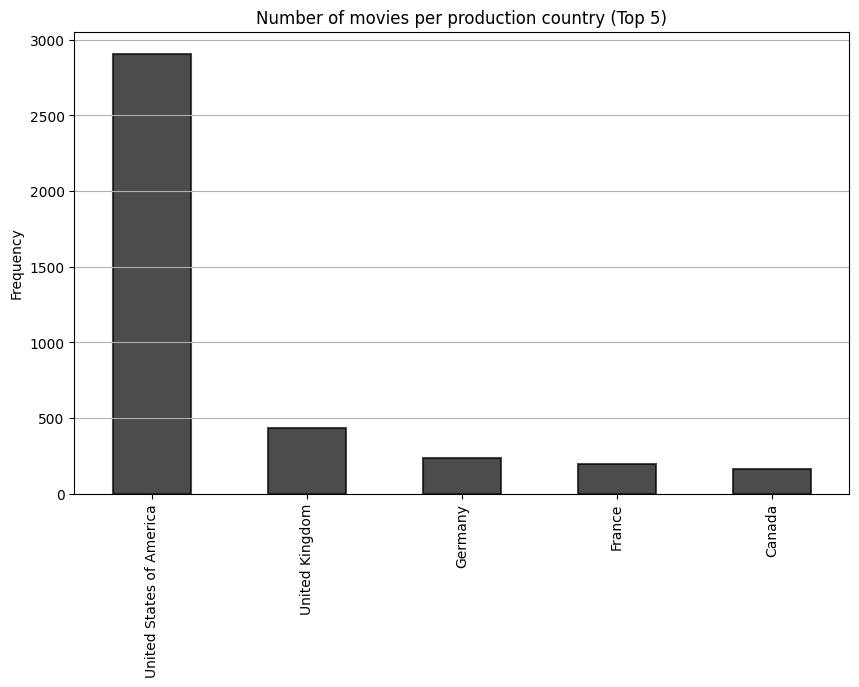

In [37]:
# Flatten the production_countries column and split the string values
countries_flattened = movies_df['production_countries'].str.replace('[', '', regex=False).str.replace(']', '', regex=False).str.replace("'", '', regex=False).str.split(', ', expand=False)

# Create a new DataFrame with the flattened country values
countries_df = pd.DataFrame({'country': countries_flattened.explode()})

# Remove any empty country values
countries_df = countries_df[countries_df['country'].notna()]

# Calculate the frequency of each country
country_counts = countries_df['country'].value_counts()

# Sort the country frequencies in descending order
country_counts_sorted = country_counts.sort_values(ascending=False)

# Plot the bar chart for the top 5 countries
plt.figure(figsize=(10, 6))
country_counts_sorted.head(5).plot(kind='bar', color='black', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.ylabel('Frequency')
plt.title('Number of movies per production country (Top 5)')
plt.grid(axis='y')
plt.show()

<strong>3. Heatmap for columns related to popularity:</strong>

We can see that people like or more willing to watch the movies with high budget (positive correlation with popularity).

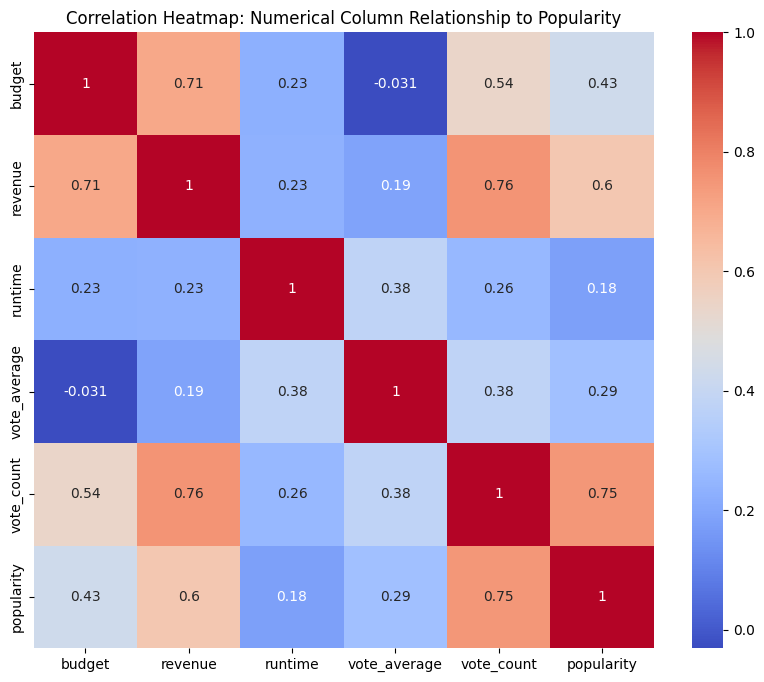

In [38]:
# Select numerical columns and popularity column
numerical_columns = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
data = movies_df[numerical_columns + ['popularity']]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Numerical Column Relationship to Popularity")
plt.show()

<strong>4. Bar chart to show popularity with years:</strong>

The is an increasing trend of the number of people (popularity) to watch movies compared with the past.

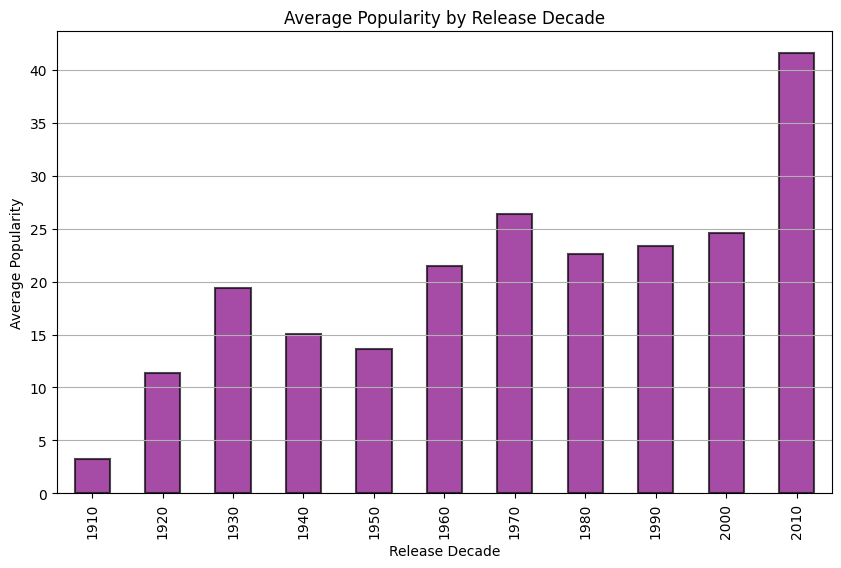

In [39]:
# Group by 'release_year' in 10-year intervals and calculate the average popularity
movies_df['release_decade'] = (movies_df['release_year'] // 10) * 10
popularity_by_decade = movies_df.groupby('release_decade')['popularity'].mean()

# Plot the chart
plt.figure(figsize=(10, 6))
popularity_by_decade.plot(kind='bar', color='purple', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.xlabel('Release Decade')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Release Decade')
plt.grid(axis='y')
plt.show()

<strong>5. Bar chart to show rating with years:</strong>

The is average vote has been steady through the years from 1910 to 2010 (ranging from 6-7).

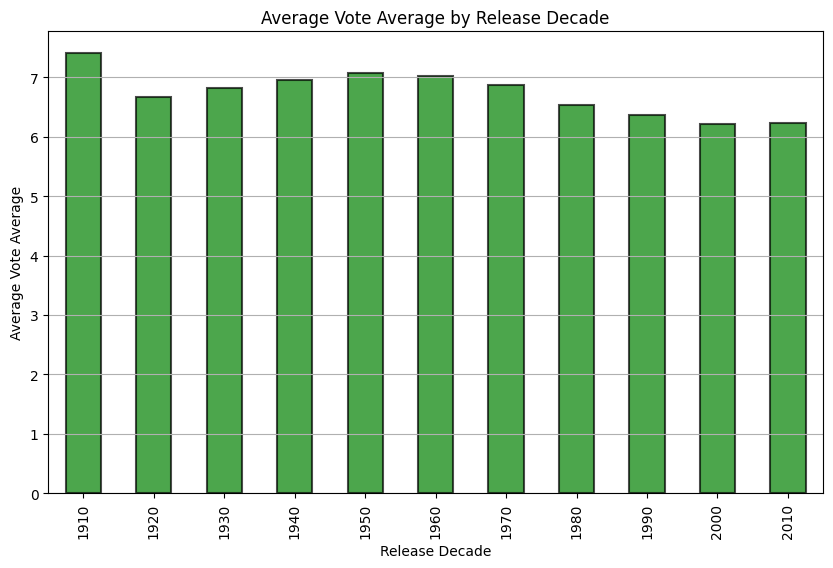

In [40]:
# Group by 'release_year' in 10-year intervals and calculate the average vote_average
movies_df['release_decade'] = (movies_df['release_year'] // 10) * 10
vote_average_by_decade = movies_df.groupby('release_decade')['vote_average'].mean()

# Plot the chart
plt.figure(figsize=(10, 6))
vote_average_by_decade.plot(kind='bar', color='green', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.xlabel('Release Decade')
plt.ylabel('Average Vote Average')
plt.title('Average Vote Average by Release Decade')
plt.grid(axis='y')
plt.show()

<strong>6. Bar chart to show the vote count with years:</strong>

More people are willing to vote or rate the movies compared with the past.

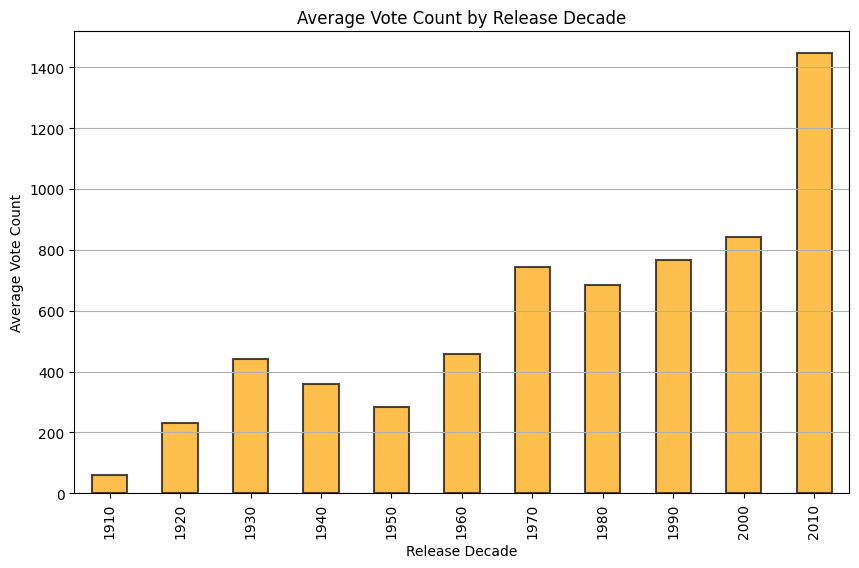

In [41]:
# Group by 'release_year' in 10-year intervals and calculate the average vote_count
movies_df['release_decade'] = (movies_df['release_year'] // 10) * 10
vote_count_by_decade = movies_df.groupby('release_decade')['vote_count'].mean()

# Plot the chart
plt.figure(figsize=(10, 6))
vote_count_by_decade.plot(kind='bar', color='orange', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.xlabel('Release Decade')
plt.ylabel('Average Vote Count')
plt.title('Average Vote Count by Release Decade')
plt.grid(axis='y')
plt.show()

<strong>7. Bar chart to show average runtime with years:</strong>

The average runtime has been kept around 2 hours.

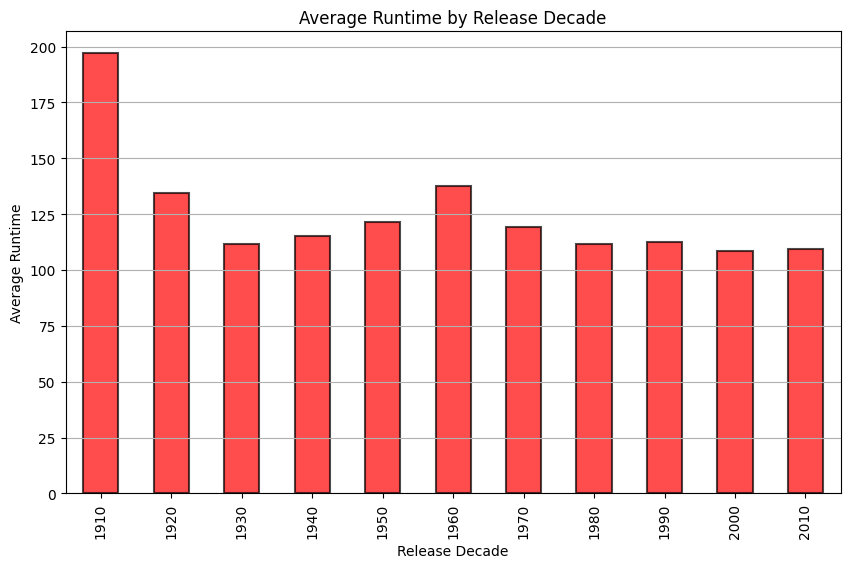

In [42]:
# Group by 'release_year' in 10-year intervals and calculate the average runtime
movies_df['release_decade'] = (movies_df['release_year'] // 10) * 10
runtime_by_decade = movies_df.groupby('release_decade')['runtime'].mean()

# Plot the chart
plt.figure(figsize=(10, 6))
runtime_by_decade.plot(kind='bar', color='red', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.xlabel('Release Decade')
plt.ylabel('Average Runtime')
plt.title('Average Runtime by Release Decade')
plt.grid(axis='y')
plt.show()

<strong>8. The bar chart to show the numbers of movie productions with years:</strong>

There is a sudden increase of movie production from 1990-2000, more investigation can be done to explore the reasons behind.

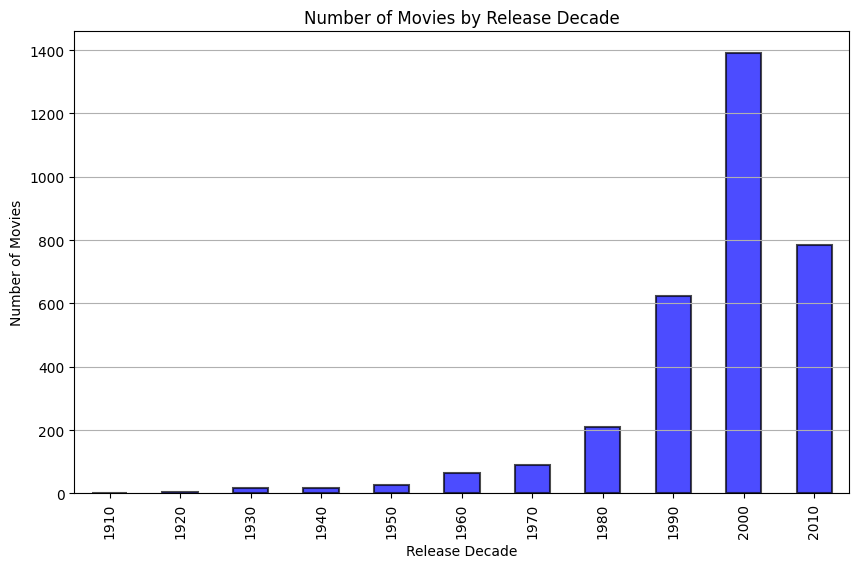

In [43]:
# Extract the year from the release_date column
movies_df['release_year'] = pd.to_datetime(movies_df['release_date']).dt.year

# Group by 10-year intervals and count the number of movies
movies_df['release_decade'] = ((movies_df['release_year'] - 1) // 10) * 10
movie_count_by_decade = movies_df['release_decade'].value_counts().sort_index()

# Plot the chart
plt.figure(figsize=(10, 6))
movie_count_by_decade.plot(kind='bar', color='blue', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.xlabel('Release Decade')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Release Decade')
plt.grid(axis='y')
plt.show()